<div class="alert alert-block alert-info">
<b> </b> </div>

<h1 style="text-align: center">Segmenting an online retail company's customers</h1>

<div class="alert alert-block alert-info">
<b> </b> </div>

<h1 style="text-align: center">Part IV Analysis of customer transaction habits</h1>

<div class="alert alert-block alert-info">
<b> </b> </div>

# Collect the Data

## Importing the Python Packages

import the required Python packages.

In [1]:
import pandas as pd
import numpy as np
from functools import reduce
from matplotlib import pyplot as plt
from IPython.display import display, HTML
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
sns.set_theme()
sns.set(font_scale=2)
sns.set(rc={"figure.figsize":(12, 8)}) #width=6, height=5
from scipy.stats import pearsonr # import pearsonr function to calculate  Pearson correlation coefficient

## Collect the sales clustering data
Import the data into a dataframe called `dfs`.

In [2]:
dfs = pd.read_excel("C:/Users/ke337467/OneDrive - Oxfordshire County Council/Data Scientist Apprenticeship/\
Module Portfolio - Data Science Professional Practice/Retail_Market/Sales_Cluster.xlsx")

## Process the Sales Clustering and add Sales Profile

In [3]:
dfs = dfs.drop(['Unnamed: 0'], axis=1)
dfs.rename(columns = {'Amount':'Sales_Amount','Frequency':'Sales_Frequency','Recency':'Sales_Recency'}, inplace = True)
dfs['Sales_Profile'] = dfs['Sales_Cluster'].astype(str)
dfs = dfs.replace({'Sales_Profile' : {'0' : 'Star', '1' : 'Occasional', '2' : 'Loyal_Plus', '3' : 'Loyal_Low'}})
dfs.head()

,CustomerID,Sales_Amount,Sales_Frequency,Sales_Recency,Sales_Cluster,Sales_Profile
0,12347,4310.00,7,3,2,Loyal_Plus
1,12348,1797.24,4,76,2,Loyal_Plus
2,12349,1757.55,1,19,1,Occasional
3,12350,334.40,1,311,0,Star
4,12352,2506.04,8,37,1,Occasional


## Collect the Returns (credit) clustering data
Import the data into a dataframe called `dfc`.

In [4]:
dfc = pd.read_excel("C:/Users/ke337467/OneDrive - Oxfordshire County Council/Data Scientist Apprenticeship/\
Module Portfolio - Data Science Professional Practice/Retail_Market/Credit_Cluster.xlsx")

In [5]:
dfc.head()

,Unnamed: 0,CustomerID,Amount,Frequency,Recency,Returns_Cluster
0,0,12352,960.63,3,263,0
1,1,12359,127.05,2,8,0
2,2,12362,71.65,3,12,2
3,3,12365,320.69,1,292,0
4,4,12375,2.08,1,3,0


## Process the Returns Clusering and add Credit Profile

In [6]:
dfc.rename(columns = {'Amount':'Credit_Amount','Frequency':'Credit_Frequency','Recency':'Credit_Recency'}, inplace = True)
dfc['Credit_Profile'] = dfc['Returns_Cluster'].astype(str)
dfc = dfc.replace({'Credit_Profile' : {'0' : 'Lost_frequent', '1' : 'Lost_HighValue', '2' : 'Unhappy', '3' : 'Unhappy_High'}})
dfc['Credit_Amount'] = dfc['Credit_Amount'] * -1
dfc.head()

,Unnamed: 0,CustomerID,Credit_Amount,Credit_Frequency,Credit_Recency,Returns_Cluster,Credit_Profile
0,0,12352,-960.63,3,263,0,Lost_frequent
1,1,12359,-127.05,2,8,0,Lost_frequent
2,2,12362,-71.65,3,12,2,Unhappy
3,3,12365,-320.69,1,292,0,Lost_frequent
4,4,12375,-2.08,1,3,0,Lost_frequent


## Combine the Sales and Returns data frames 

In [7]:
Merge = [dfs, dfc,]
df = reduce(lambda  left,right: pd.merge(left,right,on=['CustomerID'], how='outer'), Merge)
df[['Sales_Cluster', 'Returns_Cluster']] = df[['Sales_Cluster', 'Returns_Cluster']].fillna(-1) 
df = df.fillna(0)
df.head()

,CustomerID,Sales_Amount,Sales_Frequency,Sales_Recency,Sales_Cluster,Sales_Profile,Unnamed: 0,Credit_Amount,Credit_Frequency,Credit_Recency,Returns_Cluster,Credit_Profile
0,12347,4310.00,7.0,3.0,2.0,Loyal_Plus,0.0,0.00,0.0,0.0,-1.0,0
1,12348,1797.24,4.0,76.0,2.0,Loyal_Plus,0.0,0.00,0.0,0.0,-1.0,0
2,12349,1757.55,1.0,19.0,1.0,Occasional,0.0,0.00,0.0,0.0,-1.0,0
3,12350,334.40,1.0,311.0,0.0,Star,0.0,0.00,0.0,0.0,-1.0,0
4,12352,2506.04,8.0,37.0,1.0,Occasional,0.0,-960.63,3.0,263.0,0.0,Lost_frequent


<div class="alert alert-block alert-info">
<b> </b> </div>


<h1 style="text-align: center">Developing the Customer Profile</h1>

<div class="alert alert-block alert-info">
<b> </b> </div>

## Analyse the sales and return clusters adding an analysed Customer Profile

In [49]:
df[['Sales_Frequency', 'Sales_Recency','Sales_Cluster', 'Credit_Frequency','Credit_Recency', 'Returns_Cluster']] = df[['Sales_Frequency', 'Sales_Recency','Sales_Cluster', 'Credit_Frequency','Credit_Recency', 'Returns_Cluster']].astype(int)
df['NetAmount'] = df['Sales_Amount'] + df['Credit_Amount']
df['Customer_Profile'] = df['Sales_Profile'].astype(str) + '/'+ df['Credit_Profile'].astype(str)
df = df.replace({'Customer_Profile' : {'0/Lost_frequent' : 'Creditor', '0/Unhappy' : 'Creditor', '0/Unhappy_High' : 'Creditor', '0/Lost_HighValue' : 'Creditor'}})
df['Customer_Profile'] = df['Customer_Profile'].str.replace('/0', '', regex=True)
df.sample(5)

,CustomerID,Sales_Amount,Sales_Frequency,Sales_Recency,Sales_Cluster,Sales_Profile,Unnamed: 0,Credit_Amount,Credit_Frequency,Credit_Recency,Returns_Cluster,Credit_Profile,NetAmount,Customer_Profile
2610,15948,955.24,2,9,0,Star,0.0,0.0,0,0,-1,0,955.24,Star
1472,14385,202.11,3,10,1,Occasional,0.0,0.0,0,0,-1,0,202.11,Occasional
2693,16066,1521.87,5,17,1,Occasional,0.0,0.0,0,0,-1,0,1521.87,Occasional
3555,17263,63.44,1,209,2,Loyal_Plus,0.0,0.0,0,0,-1,0,63.44,Loyal_Plus
1648,14622,320.58,1,185,0,Star,0.0,0.0,0,0,-1,0,320.58,Star


## Reduce the dataframe to an output table with  key cluster fields and customer profile

In [50]:
dfa = df[['CustomerID', 'Sales_Amount', 'Credit_Amount','NetAmount','Sales_Frequency','Credit_Frequency','Sales_Recency','Credit_Recency','Customer_Profile']].copy()
dfa = dfa.sort_values(by=['NetAmount'], ascending = (False))
dfa.head(5)

,CustomerID,Sales_Amount,Credit_Amount,NetAmount,Sales_Frequency,Credit_Frequency,Sales_Recency,Credit_Recency,Customer_Profile
2537,15838,33643.08,-292.32,33350.76,19,2,12,107,Loyal_Plus/Unhappy
3651,17404,31906.82,-1606.00,30300.82,15,3,5,5,Loyal_Plus/Lost_frequent
561,13098,28882.44,-223.56,28658.88,28,13,2,4,Loyal_Plus/Lost_HighValue
550,13081,28337.38,-372.90,27964.48,11,10,12,2,Star/Unhappy
1690,14680,28754.11,-1821.77,26932.34,16,7,26,72,Star/Lost_frequent


## Return a count of the number of customers based on their profile

In [55]:
profile = dfa.Customer_Profile.value_counts()
dfp = profile.reset_index()
dfp.columns = ['Customer_Profile', 'No Customers']
dfp['Customer_Profile'] = dfp['Customer_Profile'].str.replace('_', ' ')
dfp

,Customer_Profile,No Customers
0,Loyal Plus,1559
1,Occasional,678
2,Star,442
3,Loyal Plus/Lost frequent,417
4,Loyal Plus/Unhappy,301
5,Occasional/Lost frequent,163
6,Loyal Plus/Lost HighValue,124
7,Occasional/Unhappy,124
8,Star/Lost frequent,123
9,Star/Unhappy,92


#### Create a function to display values on a barplot
The pattern to plot the values ona  bar cchart was sourced from statology and only slightly modified to suit this project.  
Source: https://www.statology.org/seaborn-barplot-show-values/

In [47]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height()) #change it from .0f to .1f or .2f to show none, one or two decimal places
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

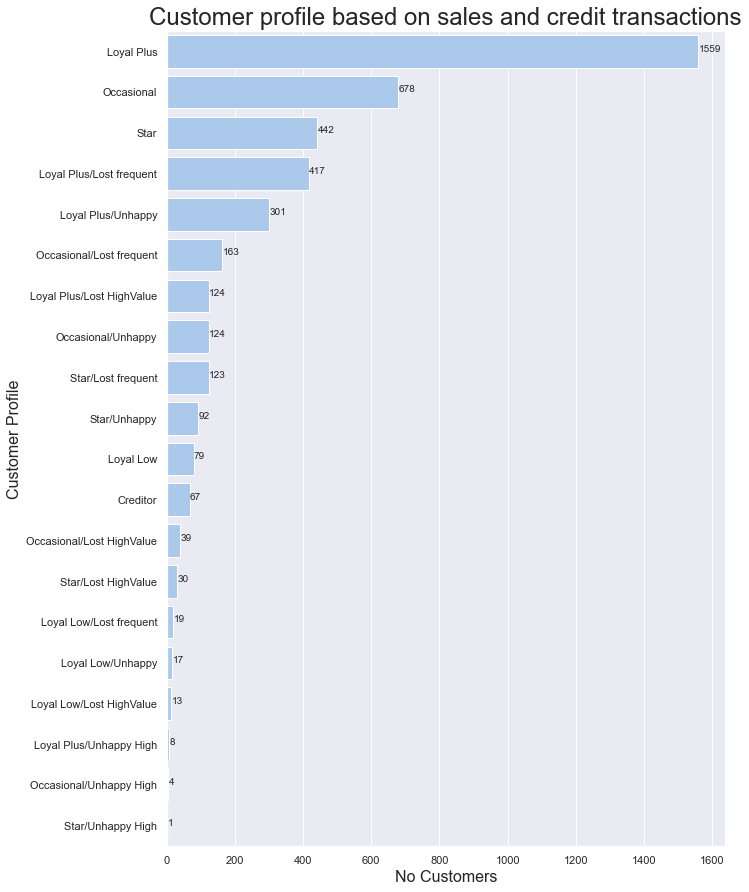

In [48]:
f, ax = plt.subplots(figsize=(10, 15))
sns.set_color_codes("pastel")
profile_plot = sns.barplot(y="Customer_Profile", x="No Customers", data=dfp,
            label="Total", color="b")
plt.title('Customer profile based on sales and credit transactions', fontsize=24)
plt.xlabel('No Customers', fontsize=16)
plt.ylabel('Customer Profile', fontsize=16)
show_values(profile_plot, "h", space=1)

<div class="alert alert-block alert-info">
<b> </b> </div>

<h1 style="text-align: center">Recommended action plan based on customer profile</h1>

<div class="alert alert-block alert-info">
<b> </b> </div>

<table>
<thead>
<tr><th> Profile </th><th># Customers </th><th> Description </th><th> Action </th></tr>
</thead>
<tbody>
<tr><th>Loyal Plus</td><td>1559</td><td> Loyal spending above average with steady shopping patterns</td><td> Market campaign or discount offer</td></tr>
<tr><th> Occasional</td><td>678</td><td>Spend less than median, shop frequently, but not recent. No returns.</td><td>Market campaign or discount offer</td></tr>
<tr><th>Star</td><td>442</td><td>High spending, though less frequent, and less recent. No returns.</td><td>Targeted follow up with discount offer</td></tr>
<tr><th>Loyal Plus/Lost frequent</td><td>417</td><td>Spend more than median, shop regularly is loyal but may be lost due to frequent though less recent returns</td><td>Targeted follow up with larger discount offer</td></tr>
<tr><th>Loyal Plus/Unhappy</td><td>301</td><td>Spend more than median, shop regularly is loyal but potentially unhappy as recently has been returning orders.</td><td>Personal communication and loyalty offer</td></tr>
<tr><th>Occasional/Lost frequent</td><td>163</td><td>Spends less than median, shops frequently, but not recently. However potentially a lost or unhappy customers due to frequent and less recent returns.</td><td> Market campaign or discount offer</td></tr>
<tr><th>Loyal Plus/Lost High Value</td><td>124</td><td>Spends more than median, shops regularly and was loyal. However these are potentially lost customers due to recent, frequent high value orders that were returned.</td><td>Targeted follow up with discount offer</td></tr>
<tr><th>Occasional/Unhappy</td><td>124</td><td>Spends less than median, shop frequently, but not recently. May be unhappy due to high value frequent returns though no recent returns suggesting customer may be lost.</td><td>Market campaign or discount offer</td></tr>
<tr><th>Star/Lost frequent</td><td>123</td><td>High spending customer, shops less frequently and is not particularly recent. Potentially lost customers due to a high frequency off returns which were not recent.</td><td> Personal communication with discount and loyalty offer</td></tr>
<tr><th>Star/Unhappy</td><td>92</td><td>High spending, though less frequent, and less recent. Low frequency recent returns suggest that this customer is not lost but potentially could be dissatisfied with recent purchases.</td><td>Personal communication with discount and loyalty offer</td></tr>
<tr><th>Loyal Low</td><td>79</td><td>Regular, reliable, and loyal customers, not the biggest spenders but they do not return or cancel orders.</td><td>Market campaign or discount offer</td></tr>
<tr><th>Creditor</td><td>67</td><td>Creditors, all orders returned</td><td>No Action</td></tr>
<tr><th>Occasional/Lost High Value</td><td>39</td><td>Spends less than median, shop frequently, but not recently. However these customers return or cancel orders valued significantly above the average and exhibit the highest frequency of returns, although their returns are less recent suggest that they may be lost customers.</td><td>Market campaign or discount offer</td></tr>
<tr><th>Star/Lost High Value</td><td>30</td><td>High spending, though less frequent, and less recent customer. However these customers return or cancel orders valued significantly above the average and exhibit the highest frequency of returns, although their returns are less recent suggest that they may be lost customers.</td><td>Personal communication including phone call with discount and loyalty offer</td></tr>
<tr><th>Loyal Low/Lost frequent</td><td>19</td><td>Regular, reliable, and loyal customers, but they are not the biggest spenders. Occasional low value returns.</td><td>Targeted follow up with discount offer</td></tr>
</tbody>
<tr><th>Loyal Low/Unhappy</td><td>17</td><td>Regular, reliable, and loyal customers, but they are not the biggest spenders. Recent  low value returns</td><td>Market campaign or discount offer</td></tr>
</tbody>
<tr><th>Loyal Low/Lost High Value</td><td>13</td><td>Regular, reliable, and loyal customers, but they are not the biggest spenders. However these customers return or cancel orders valued significantly above the average and exhibit the highest frequency of returns, although their returns are less recent suggest that they may be lost customers.</td><td>Personal communication including phone call with discount and loyalty offer</td></tr>
</tbody>
<tr><th>Loyal Plus/Unhappy High</td><td>8</td><td>Spends more than median, shops regularly and was loyal. Return high value orders more frequently than the average, and the least recent suggesting they may be lost customers.</td><td>Market campaign or discount offer</td></tr>
</tbody>
<tr><th>Occasional/Unhappy High</td><td>4</td><td>Spends less than median, shop frequently, but not recently. Return high value orders more frequently than the average, and the least recent suggesting they may be lost customers.</td><td>Personal communication including phone call with discount and loyalty offer</td></tr>
</tbody>
<tr><th>Star/Unhappy High</td><td>1</td><td>High spending, though less frequent, and less recent. Return high value orders more frequently than the average, and the least recent suggesting they may be lost customers.</td><td>Targeted follow up with discount offer</td></tr>
</tbody>
</table>

# END

<div class="alert alert-block alert-info">
<b> </b> </div>